In [1]:
from Classes.LoadModel import BaseModel
from Classes.Predict import Prediction
from Classes.Summarize import *
from Classes.Multiclass_model import *
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Layer, Input, Dropout, Activation, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Conv2D, MaxPool2D, Dropout, Flatten, LeakyReLU, BatchNormalization)
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_VGG16

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
# Start images processing and dataframe splitting
Multi = Multiclass_Model(IND_FILE)
trainer = Train(IND_FILE, IMAGE_PATH)

In [3]:
data = pd.read_csv('/home/ubuntu/jonathan/files_list.csv')
data.head()

,Unnamed: 0,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,0_5_o_Clock_Shadow,0_Arched_Eyebrows,0_Attractive,0_Bags_Under_Eyes,0_Bald,0_Bangs,0_Big_Lips,0_Big_Nose,0_Black_Hair,0_Blond_Hair,0_Blurry,0_Brown_Hair,0_Bushy_Eyebrows,0_Chubby,0_Double_Chin,0_Eyeglasses,0_Goatee,0_Gray_Hair,0_Heavy_Makeup,0_High_Cheekbones,0_Male,0_Mouth_Slightly_Open,0_Mustache,0_Narrow_Eyes,0_No_Beard,0_Oval_Face,0_Pale_Skin,0_Pointy_Nose,0_Receding_Hairline,0_Rosy_Cheeks,0_Sideburns,0_Smiling,0_Straight_Hair,0_Wavy_Hair,0_Wearing_Earrings,0_Wearing_Hat,0_Wearing_Lipstick,0_Wearing_Necklace,0_Wearing_Necktie,0_Young
0,0,face_att_000007.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000051.jpg,face_att_000009.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000007.jpg,face_att_000013.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000007.jpg,face_att_000020.jpg,face_att_000047.jpg,face_att_000053.jpg,face_att_000020.jpg,face_att_000021.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000109.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000009.jpg,face_att_000019.jpg,face_att_000001.jpg,face_att_000025.jpg,face_att_000009.jpg,face_att_000020.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000037.jpg,face_att_000001.jpg,face_att_000004.jpg,face_att_000015.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000016.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000015.jpg
1,1,face_att_000008.jpg,face_att_000005.jpg,face_att_000004.jpg,face_att_000007.jpg,face_att_000079.jpg,face_att_000029.jpg,face_att_000005.jpg,face_att_000007.jpg,face_att_000008.jpg,face_att_000018.jpg,face_att_000049.jpg,face_att_000002.jpg,face_att_000012.jpg,face_att_000031.jpg,face_att_000051.jpg,face_att_000093.jpg,face_att_000060.jpg,face_att_000051.jpg,face_att_000005.jpg,face_att_000002.jpg,face_att_000007.jpg,face_att_000002.jpg,face_att_000209.jpg,face_att_000005.jpg,face_att_000002.jpg,face_att_000012.jpg,face_att_000048.jpg,face_att_000003.jpg,face_att_000031.jpg,face_att_000018.jpg,face_att_000037.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000006.jpg,face_att_000004.jpg,face_att_000068.jpg,face_att_000004.jpg,face_att_000014.jpg,face_att_000021.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000003.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000020.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000006.jpg,face_att_000

In [4]:
print('Reading File...')
print(f'Preparing data.. \nCreating Train, Test...')

label_list = ['Brown_Hair','Blond_Hair', 'Black_Hair','Bald', 'Gray_Hair']
train, test = Multi.create_dataframe_multi(label_list, 4500)
print('Done!')

Reading File...
Preparing data.. 
Creating Train, Test...
Assertions Passed! Sets  Are of image files W/O Duplication
Done!


In [5]:
# Split Train, Validation and Test Sets
from tensorflow.keras.applications.resnet50 import preprocess_input as Preprocess_RESNET
print(f'\nRunning data generator...')
model_name = 'ResNet'
train_data, valid_data, test_data = Multi.generator_splitter_multi(model_name, train, test, IMAGE_PATH, Preprocess_RESNET)


Running data generator...
Found 13804 validated image filenames belonging to 5 classes.
Found 3450 validated image filenames belonging to 5 classes.
Found 4494 validated image filenames.


In [6]:
print(f'\n\nLoading Model...')
print('Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race')
label_name = 'Hair_color'
model_file = os.path.join('Weights/', model_name + '_' + label_name + '.h5')
json_path = os.path.join('json/', model_name + '_' + label_name + '.json')
epoch = 100



Loading Model...
Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race


In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers:
     layer.trainable = False
     
# Build the classification layers on top of the base VGG16 base layers for the dataset
model = tf.keras.Sequential(base_model)

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(5, activation = 'softmax'))

# model.compile(optimizer=tf.keras.optimizers.Adam(), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               51380736  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1

In [8]:
history, model = trainer.start_train(model, model_file, train_data, valid_data, epoch, multi=True,
                                     callback=None,
                                     optimize=None)
print('Loading best weights...')
model.load_weights(model_file)
print('Done!')

# Saving History
with open(json_path, 'w') as f:
    json.dump(history.history, f)
history = json.load(open(json_path))

Epoch 1/100
215/215 [==============================] - ETA: 0s - loss: 1.0037 - accuracy: 0.6232
Epoch 00001: val_loss improved from inf to 0.55246, saving model to Weights/ResNet_Hair_color.h5
215/215 [==============================] - 100s 466ms/step - loss: 1.0037 - accuracy: 0.6232 - val_loss: 0.5525 - val_accuracy: 0.7922
Epoch 2/100
215/215 [==============================] - ETA: 0s - loss: 0.6366 - accuracy: 0.7638
Epoch 00002: val_loss improved from 0.55246 to 0.51668, saving model to Weights/ResNet_Hair_color.h5
215/215 [==============================] - 99s 458ms/step - loss: 0.6366 - accuracy: 0.7638 - val_loss: 0.5167 - val_accuracy: 0.8072
Epoch 3/100
215/215 [==============================] - ETA: 0s - loss: 0.4926 - accuracy: 0.8189
Epoch 00003: val_loss improved from 0.51668 to 0.49081, saving model to Weights/ResNet_Hair_color.h5
215/215 [==============================] - 99s 459ms/step - loss: 0.4926 - accuracy: 0.8189 - val_loss: 0.4908 - val_accuracy: 0.8258
Epoch 4

In [9]:
# Evaluate the network on valid data
Prediction.evaluate_model(model, valid_data)

Evaluating the network ...
54/54 [==============================] - 18s 327ms/step - loss: 0.4685 - accuracy: 0.8362
Validation Loss:	0.469
Validation Acc.:	0.836


In [10]:
labels = (train_data.class_indices)
labels

{'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}

In [11]:
# Predict on test data
y_pred = Prediction.test_prediction(model, test_data, train_data)

Starting prediction...
Done!


In [12]:
# plot
top = min(len(test['label']), len(y_pred))
metrics = Metrics(history, epoch, test['label'][:top].tolist(), y_pred[:top], model_name, label_name)
metrics.confusion_matrix()

Confusion Matrix ...
     0    1    2    3    4
0  828   10    1    0   60
1   17  748    0  116    9
2    2    2  825   32   34
3    4  119  108  633   34
4  236   21   62   10  569


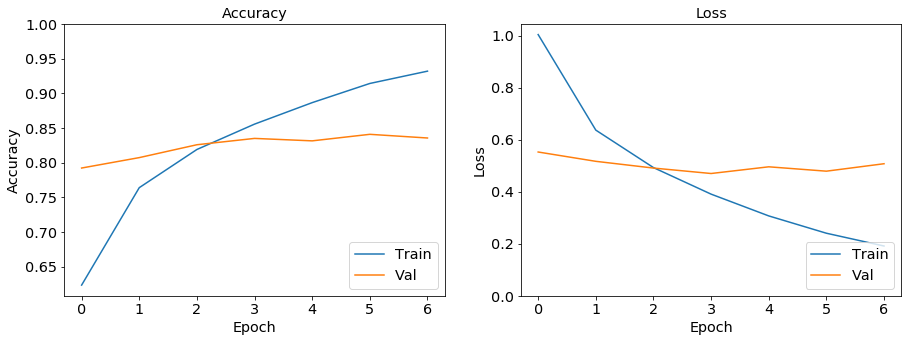

In [13]:
metrics.acc_loss_graph()

In [14]:
from sklearn.metrics import classification_report
top = min(len(test['label']), len(y_pred))
print(classification_report(test['label'][:top].tolist(), y_pred[:top]))

              precision    recall  f1-score   support

        Bald       0.76      0.92      0.83       899
  Black_Hair       0.83      0.84      0.84       890
  Blond_Hair       0.83      0.92      0.87       895
  Brown_Hair       0.80      0.70      0.75       898
   Gray_Hair       0.81      0.63      0.71       898

    accuracy                           0.80      4480
   macro avg       0.81      0.80      0.80      4480
weighted avg       0.81      0.80      0.80      4480



In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['label'][:top].tolist(), y_pred[:top], labels=['Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair'])

array([[828,  10,   1,   0,  60],
       [ 17, 748,   0, 116,   9],
       [  2,   2, 825,  32,  34],
       [  4, 119, 108, 633,  34],
       [236,  21,  62,  10, 569]])

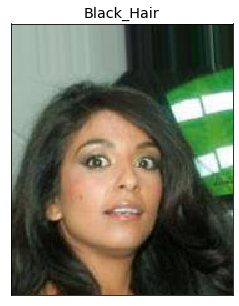

In [15]:
labels_hair = {'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}
Prediction.predict_label_multi(model, labels_hair, '/home/ubuntu/sheryl/face_att_sheryl/face_att_018217.jpg')

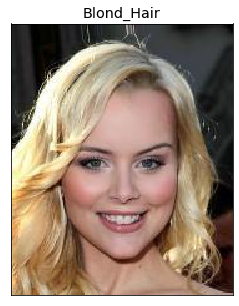

In [23]:
Prediction.predict_label_multi(model, labels_hair, '/home/ubuntu/sheryl/face_att_sheryl/face_att_028278.jpg')